In [3]:
%matplotlib inline
import seaborn as sns
import math
import datetime
import matplotlib.pyplot as plt
import operator
import random
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_summary import DataFrameSummary
from isoweek import Week
from tqdm import tqdm
pd.options.display.max_columns = 50
from sklearn.externals import joblib

In [119]:
from keras.models import load_model
from keras.layers import Input, Dense, BatchNormalization, Dropout, Activation
from keras.models import Model

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [102]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = pd.concat((df_train, df_test)).reset_index(drop=True)
saleprice = df_train['SalePrice'].values
df_all = df_all.drop(['SalePrice'], axis=1)

n_train = df_train.shape[0]
n_test = df_test.shape[0]

print df_train.shape
print df_test.shape
print df_all.shape

(1460, 81)
(1459, 80)
(2919, 80)


In [103]:
train_dfs = DataFrameSummary(df_train)
dfs = DataFrameSummary(df_all)
dfs_summary = dfs.summary()
display(dfs_summary)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,...,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919,2919,2919,NaN,2919,NaN,NaN,NaN,2918,2918,NaN,NaN,2917,2917,NaN,2918,NaN,NaN,NaN,NaN,2919,NaN,NaN,NaN,NaN,...,2896,NaN,NaN,2919,2919,NaN,2919,2919,2919,NaN,2919,NaN,NaN,NaN,NaN,NaN,2919,NaN,2919,2918,NaN,2919,2919,2919,2919
mean,1159.58,336.484,2.60226,NaN,2.86023,NaN,NaN,NaN,441.423,49.5822,NaN,NaN,0.429894,0.0613644,NaN,560.772,NaN,NaN,NaN,NaN,23.0983,NaN,NaN,NaN,NaN,...,102.201,NaN,NaN,50.826,6.21309,NaN,47.4868,5.56458,6.08907,NaN,2.2518,NaN,NaN,NaN,NaN,NaN,16.0624,NaN,6.45152,1051.78,NaN,93.7098,1971.31,1984.26,2007.79
std,392.362,428.701,25.1882,NaN,0.822693,NaN,NaN,NaN,455.611,169.206,NaN,NaN,0.524736,0.245687,NaN,439.544,NaN,NaN,NaN,NaN,64.2442,NaN,NaN,NaN,NaN,...,179.334,NaN,NaN,567.402,2.71476,NaN,67.5755,1.11313,1.40995,NaN,35.6639,NaN,NaN,NaN,NaN,NaN,56.1844,NaN,1.56938,440.766,NaN,126.527,30.2914,20.8943,1.31496
min,334,0,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,1,NaN,0,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,2,0,NaN,0,1872,1950,2006
25%,876,0,0,NaN,2,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,220,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,4,NaN,0,5,5,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,5,793,NaN,0,1953.5,1965,2007
50%,1082,0,0,NaN,3,NaN,NaN,NaN,368.5,0,NaN,NaN,0,0,NaN,467,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,NaN,NaN,0,6,NaN,26,5,6,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,6,989.5,NaN,0,1973,1993,2008
75%,1387.5,704,0,NaN,3,NaN,NaN,NaN,733,0,NaN,NaN,1,0,NaN,805.5,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,164,NaN,NaN,0,8,NaN,70,6,7,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,7,1302,NaN,168,2001,2004,2009
max,5095,2065,508,NaN,8,NaN,NaN,NaN,5644,1526,NaN,NaN,3,2,NaN,2336,NaN,NaN,NaN,NaN,1012,NaN,NaN,NaN,NaN,...,1600,NaN,NaN,17000,12,NaN,742,9,10,NaN,800,NaN,NaN,NaN,NaN,NaN,576,NaN,15,6110,NaN,1424,2010,2010,2010
counts,2919,2919,2919,198,2919,2919,2837,2837,2918,2918,2840,2839,2917,2917,2838,2918,2919,2919,2919,2918,2919,2919,2919,2918,2918,...,2896,2895,105,2919,2919,2919,2919,2919,2919,2919,2919,10,2919,2919,2919,2918,2919,2919,2919,2918,2917,2919,2919,2919,2919
uniques,1083,635,31,2,8,5,4,4,991,272,6,6,4,3,4,1135,2,9,8,5,183,5,4,15,16,...,444,4,4,38,12,25,252,9,10,3,14,3,8,6,6,9,121,2,14,1058,2,379,118,61,5


mean                                                        180921
std                                                        79442.5
variance                                               6.31111e+09
min                                                          34900
max                                                         755000
5%                                                           88000
25%                                                         129975
50%                                                         163000
75%                                                         214000
95%                                                         326100
iqr                                                          84025
kurtosis                                                   6.53628
skewness                                                   1.88288
sum                                                      264144946
mad                                                        574

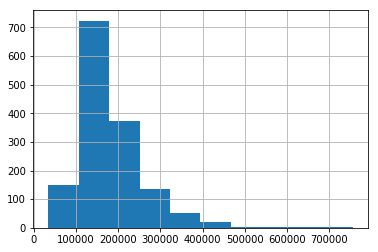

In [104]:
train_dfs['SalePrice']

In [105]:
df_missing_perc = dfs_summary.loc['missing_perc', :]
df_missing_perc.sort_values(ascending = False, inplace=True)
df_missing_perc[df_missing_perc.values != '0%']

PoolQC          99.66%
MiscFeature     96.40%
Alley           93.22%
Fence           80.44%
GarageCond       5.45%
GarageFinish     5.45%
GarageQual       5.45%
GarageYrBlt      5.45%
GarageType       5.38%
FireplaceQu     48.65%
BsmtCond         2.81%
BsmtExposure     2.81%
BsmtQual         2.77%
BsmtFinType2     2.74%
BsmtFinType1     2.71%
LotFrontage     16.65%
MasVnrType       0.82%
MasVnrArea       0.79%
MSZoning         0.14%
BsmtFullBath     0.07%
BsmtHalfBath     0.07%
Functional       0.07%
Utilities        0.07%
Electrical       0.03%
Exterior2nd      0.03%
KitchenQual      0.03%
Exterior1st      0.03%
GarageCars       0.03%
TotalBsmtSF      0.03%
GarageArea       0.03%
BsmtUnfSF        0.03%
BsmtFinSF2       0.03%
BsmtFinSF1       0.03%
SaleType         0.03%
Name: missing_perc, dtype: object

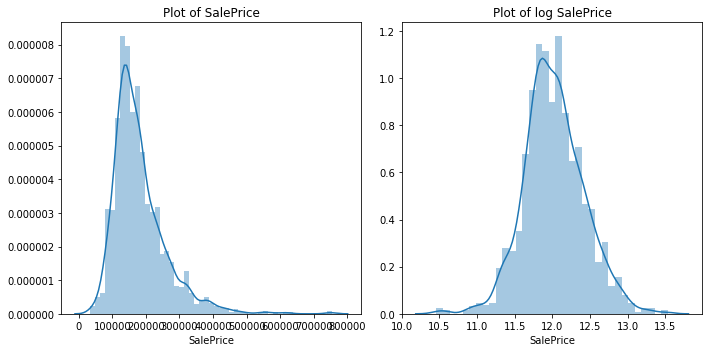

In [106]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(df_train['SalePrice'], ax = axes[0]).set_title('Plot of SalePrice')
sns.distplot(np.log(df_train['SalePrice']), ax = axes[1]).set_title('Plot of log SalePrice')
plt.tight_layout()
plt.show()

In [107]:
def replace_1(df_column):
    return df_column.replace({"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5})

def replace_2(df_column):
    return df_column.replace({"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6})

def replace_3(df_column):
    return df_column.replace({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3})

def replace_4(df_column):
    return df_column.replace({"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8})


In [108]:
def handle_missing_data(df):    
    df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
   
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    
    df['BsmtCond'] = replace_1(df['BsmtCond'])
    df['BsmtExposure'] = replace_3(df['BsmtExposure'])
    df['BsmtFinType1'] = replace_2(df['BsmtFinType1'])
    df['BsmtFinType2'] = replace_2(df['BsmtFinType2'])
    df['BsmtQual'] = replace_1(df['BsmtQual'])
    df['ExterCond'] = replace_1(df['ExterCond'])
    df['ExterQual'] = replace_1(df['ExterQual'])
    df['FireplaceQu'] = replace_1(df['FireplaceQu'])
    df['Functional'] = replace_4(df['Functional'])
    df['GarageCond'] = replace_1(df['GarageCond'])
    df['GarageQual'] = replace_1(df['GarageQual'])
    df['HeatingQC'] = replace_1(df['HeatingQC'])
    df['KitchenQual'] = replace_1(df['KitchenQual'])
    df['PoolQC'] = replace_1(df['PoolQC'])
    
    df['isBasement'] = df['TotalBsmtSF'] > 0.
    df['TotalSquareFloor'] = df['TotalBsmtSF'] + df['GrLivArea']
    df['TotalProch'] = df["OpenPorchSF"] + df["EnclosedPorch"] + \
                        df["3SsnPorch"] + df["ScreenPorch"]
    df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + \
                        df["FullBath"] + (0.5 * df["HalfBath"])
    
    return df

In [109]:
df_all = handle_missing_data(df_all)

In [110]:
dfs = DataFrameSummary(df_all)
dfs_summary = dfs.summary()
display(dfs_summary)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,...,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,isBasement,TotalSquareFloor,TotalProch,TotalBath
count,2919,2919,2919,NaN,2919,NaN,2919,2919,2918,2918,2919,2919,2919,2919,2919,2919,NaN,NaN,NaN,NaN,2919,2919,2919,NaN,NaN,...,NaN,NaN,2919,2919,2919,NaN,2919,2919,NaN,NaN,NaN,NaN,2919,NaN,2919,2918,NaN,2919,2919,2919,NaN,NaN,2918,2919,2919
mean,1159.58,336.484,2.60226,NaN,2.86023,NaN,2.91847,0.651936,441.423,49.5822,3.54162,1.27372,0.429599,0.0613224,3.47756,560.58,NaN,NaN,NaN,NaN,23.0983,3.08565,3.39671,NaN,NaN,...,NaN,NaN,47.4868,5.56458,6.08907,NaN,2.2518,0.0137033,NaN,NaN,NaN,NaN,16.0624,NaN,6.45152,1051.78,NaN,93.7098,1971.31,1984.26,NaN,NaN,2552.74,89.2497,2.2184
std,392.362,428.701,25.1882,NaN,0.822693,NaN,0.57495,1.03971,455.611,169.206,2.11385,0.95518,0.524676,0.245608,0.905448,439.591,NaN,NaN,NaN,NaN,64.2442,0.372361,0.580293,NaN,NaN,...,NaN,NaN,67.5755,1.11313,1.40995,NaN,35.6639,0.242398,NaN,NaN,NaN,NaN,56.1844,NaN,1.56938,440.766,NaN,126.527,30.2914,20.8943,NaN,NaN,805.573,107.903,0.80884
min,334,0,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,2,NaN,NaN,...,NaN,NaN,0,1,1,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,2,0,NaN,0,1872,1950,NaN,NaN,334,0,1
25%,876,0,0,NaN,2,NaN,3,0,0,0,1,1,0,0,3,220,NaN,NaN,NaN,NaN,0,3,3,NaN,NaN,...,NaN,NaN,0,5,5,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,5,793,NaN,0,1953.5,1965,NaN,NaN,2004.25,0,1.5
50%,1082,0,0,NaN,3,NaN,3,0,368.5,0,4,1,0,0,4,467,NaN,NaN,NaN,NaN,0,3,3,NaN,NaN,...,NaN,NaN,26,5,6,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,6,989.5,NaN,0,1973,1993,NaN,NaN,2453,50,2
75%,1387.5,704,0,NaN,3,NaN,3,1,733,0,6,1,1,0,4,805,NaN,NaN,NaN,NaN,0,3,4,NaN,NaN,...,NaN,NaN,70,6,7,NaN,0,0,NaN,NaN,NaN,NaN,0,NaN,7,1302,NaN,168,2001,2004,NaN,NaN,2996,136,2.5
max,5095,2065,508,NaN,8,NaN,4,3,5644,1526,6,6,3,2,5,2336,NaN,NaN,NaN,NaN,1012,5,5,NaN,NaN,...,NaN,NaN,742,9,10,NaN,800,5,NaN,NaN,NaN,NaN,576,NaN,15,6110,NaN,1424,2010,2010,NaN,NaN,11752,1207,7
counts,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2919,2919,2919,2918,2918,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2919,2919,2919,2918,2919,2919,2919,2919,2919,2919,2918,2919,2919
uniques,1083,635,31,3,8,5,5,4,991,272,7,7,4,3,5,1135,2,9,8,5,183,5,4,15,16,...,12,25,252,9,10,3,14,4,8,6,6,9,121,2,14,1058,2,379,118,61,5,2,1500,371,11


In [117]:
cat_features = dfs_summary.columns[(dfs_summary.loc['types', :] == 'categorical').values].tolist()
df_all_dummy = pd.get_dummies(df_all, columns=cat_features, prefix=cat_features)
df_all_dummy = df_all_dummy.drop('Id', axis = 1)
X_full_train = df_all_dummy[:n_train]
X_test = df_all_dummy[n_train:]
Y_full_train = saleprice

X_train, X_val, Y_train, Y_val = train_test_split(X_full_train, Y_full_train, test_size = 0.20)

In [118]:
print X_full_train.shape
print Y_full_train.shape
print X_train.shape
print Y_train.shape
print X_val.shape
print Y_val.shape
print X_test.shape

(1460, 271)
(1460,)
(1168, 271)
(1168,)
(292, 271)
(292,)
(1459, 271)


In [113]:
df_all_dummy.columns.tolist()

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'Fireplaces',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'HeatingQC',
 'KitchenAbvGr',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'PoolQC',
 'ScreenPorch',
 'Street',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'Utilities',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'isBasement',
 'TotalSquareFloor',
 'TotalProch',
 'TotalBath',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Co

In [120]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from keras.models import load_model
from keras.layers import Input, Dense, BatchNormalization, Dropout, Activation
from keras.models import Model
from keras import backend as K
from xgboost import XGBRegressor

In [ ]:
linear_model = LinearRegression()